# **Comparative Analysis of European Option Pricing: Black-Scholes vs Binomial Tree**

This project aims to implement and compare two popular models used for pricing European call and put options:

- **Black-Scholes Model (BSM)**: A closed-form solution assuming continuous trading and constant volatility.
- **Binomial Option Pricing Model (BOPM)**: A discrete-time model that converges to the BSM value as the number of steps increases.

### Goals:
- Implement both pricing models.
- Compare pricing accuracy, efficiency, and convergence.
- Analyze sensitivity to key parameters like volatility, strike price, interest rate, and time to maturity.
- Use real-world market data (e.g., AAPL, SPY) to validate results.

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm

%matplotlib inline
sns.set()

## Black-Scholes Option Pricing Model (BSM)

The **Black-Scholes Model (BSM)** is a **closed-form analytical model** used to price **European-style options**. It assumes that the underlying asset follows a **geometric Brownian motion** with **constant volatility** and **interest rates**, and provides a theoretical estimate of the fair price of a call or put option.

---

### Key Concepts

- **Closed-form formula**: Provides an exact solution for option price.
- **European Options Only**: Can only be exercised at maturity.
- **Risk-neutral framework**: Prices options based on no-arbitrage principle.

---

### Assumptions

- The option is **European** and cannot be exercised before expiration.
- The underlying asset **pays no dividends** during the option's life.
- **Markets are efficient** — no arbitrage opportunities.
- **No transaction costs** or taxes.
- The **risk-free rate (r)** and **volatility (σ)** are **known and constant**.
- The **underlying asset price follows a lognormal distribution** (geometric Brownian motion).
- The asset’s **returns are normally distributed**.

---

### Mathematical Formulation

#### **Call Option Price**:

$$
C = S_0 N(d_1) - K e^{-rT} N(d_2)
$$

#### **Put Option Price**:

$$
P = K e^{-rT} N(-d_2) - S_0 N(-d_1)
$$

Where:

$$
d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right) T}{\sigma \sqrt{T}}, \quad
d_2 = d_1 - \sigma \sqrt{T}
$$

---

### Parameters

- **$S_0$**: Current price of the underlying asset  
- **K**: Strike price  
- **r**: Risk-free interest rate  
- **T**: Time to expiration (in years)  
- **$\sigma$**: Volatility of the underlying asset  
- **$N(\cdot)$**: Cumulative distribution function (CDF) of the standard normal distribution  

---

### Use Case

- Best suited for **European-style options**.
- Efficient and fast pricing when assumptions are met.
- Commonly used in financial markets due to its simplicity and closed-form nature.

---

### Limitations

- Cannot handle **American options** (no early exercise).
- Assumes **constant volatility**, which often doesn’t hold in real markets.
- Doesn’t account for **dividends** unless modified.
- Market frictions (taxes, transaction costs, illiquidity) are ignored.
- Less flexible than tree-based models in dealing with **path-dependent options** or varying conditions.


## Option Greeks

Option Greeks measure the sensitivity of the option price to various factors like price, time, volatility, and interest rate. Here's a summary:

---

### 1. Delta \$( \Delta \)$

Measures the rate of change of the option price with respect to changes in the underlying asset's price.

- **Call Option**:  
  $$
  \Delta = N(d_1)
  $$

- **Put Option**:  
  $$
  \Delta = N(d_1) - 1
  $$

---

### 2. Gamma \$( \Gamma \)$

Measures the rate of change of Delta with respect to changes in the underlying asset's price.

$$
\Gamma = \frac{N'(d_1)}{S_0 \cdot \sigma \cdot \sqrt{T}}
$$

---

### 3. Vega \$( V \)$

Measures sensitivity of the option price to changes in volatility.

$$
V = S_0 \cdot N'(d_1) \cdot \sqrt{T}
$$

---

### 4. Theta \$( \Theta \)$

Measures the rate of change of the option price with respect to time (i.e., time decay).

- **Call Option**:
  $$
  \Theta = -\frac{S_0 \cdot N'(d_1) \cdot \sigma}{2 \sqrt{T}} - rK e^{-rT} N(d_2)
  $$

- **Put Option**:
  $$
  \Theta = -\frac{S_0 \cdot N'(d_1) \cdot \sigma}{2 \sqrt{T}} + rK e^{-rT} N(-d_2)
  $$

---

### 5. Rho \$( \rho \)$

Measures sensitivity of the option price to changes in the risk-free interest rate.

- **Call Option**:
  $$
  \rho = K T e^{-rT} N(d_2)
  $$

- **Put Option**:
  $$
  \rho = -K T e^{-rT} N(-d_2)
  $$

---

**Note**:  
- **$ N(d)$**: Cumulative distribution function of the standard normal distribution  
- **$N'(d)$**: Probability density function (i.e., standard normal PDF)


### Implementation of Black-Scholes Model

This class-based implementation models the theoretical price of a **European call or put option** using the **Black-Scholes formula**. It also calculates key **option Greeks** (Delta, Gamma, Vega, Theta, and Rho) to understand the sensitivity of the option price to different input parameters.

#### Class: `BlackScholesModel`

- **Inputs:**
  - `S` : Current stock price
  - `K` : Strike price
  - `T` : Time to maturity (in years)
  - `r` : Risk-free interest rate
  - `sigma` : Volatility
  - `option_type` : 'call' or 'put'

- **Methods:**
  - `d1()` and `d2()` – Intermediate terms used in the Black-Scholes formula
  - `price()` – Computes option price using the Black-Scholes closed-form formula
  - `greeks()` – Returns a dictionary of all five primary Greeks

This modular structure allows flexible evaluation of both the **price** and the **risk characteristics** of European options under the Black-Scholes framework.


In [ ]:
class BlackScholesModel:
    def __init__(self, S, K, T, r, sigma, option_type='call'):
        self.S = S              # Current stock price
        self.K = K              # Strike price
        self.T = T              # Time to maturity (in years)
        self.r = r              # Risk-free interest rate
        self.sigma = sigma      # Volatility
        self.option_type = option_type.lower()

    def d1(self):
        return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))

    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)

    def price(self):
        d1 = self.d1()
        d2 = self.d2()
        if self.option_type == 'call':
            return self.S * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
        elif self.option_type == 'put':
            return self.K * np.exp(-self.r * self.T) * norm.cdf(-d2) - self.S * norm.cdf(-d1)
        else:
            raise ValueError("Option type must be 'call' or 'put'")

    def greeks(self):
        d1 = self.d1()
        d2 = self.d2()
        greeks = {}
        if self.option_type == 'call':
            greeks['Delta'] = norm.cdf(d1)
            greeks['Theta'] = (-self.S * norm.pdf(d1) * self.sigma / (2 * np.sqrt(self.T))) - self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
            greeks['Rho']   = self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(d2)
        elif self.option_type == 'put':
            greeks['Delta'] = norm.cdf(d1) - 1
            greeks['Theta'] = (-self.S * norm.pdf(d1) * self.sigma / (2 * np.sqrt(self.T))) + self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(-d2)
            greeks['Rho']   = -self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(-d2)

        greeks['Gamma'] = norm.pdf(d1) / (self.S * self.sigma * np.sqrt(self.T))
        greeks['Vega'] = self.S * norm.pdf(d1) * np.sqrt(self.T)

        return greeks

In [ ]:
# Sample parameters
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.2

bsm_call = BlackScholesModel(S, K, T, r, sigma, option_type='call')

# Calculate and print Call price
call_price = bsm_call.price()
print(f"Call Option Price: {call_price:.4f}")

# Calculate and print Greeks
call_greeks = bsm_call.greeks()
print("Call Option Greeks:")
for greek, value in call_greeks.items():
    print(f"{greek}: {value:.4f}")

Call Option Price: 10.4506
Call Option Greeks:
Delta: 0.6368
Theta: -6.4140
Rho: 53.2325
Gamma: 0.0188
Vega: 37.5240


### Binomial Option Pricing Model (BOPM)

The **Binomial Option Pricing Model (BOPM)** is a method for valuing options using a discrete-time framework. It models the underlying asset price movement as a series of up or down moves over discrete time steps, building a **binomial tree**.

---

#### **Key Concepts**

- **Discrete Price Movement**: In each time step, the stock price can go **up** by a factor **u** or **down** by a factor **d**.
- **Risk-Neutral Valuation**: Uses a risk-neutral probability **q** to compute the expected payoff.
- **Backward Induction**: Option value is calculated from the final nodes backward to the present.

---

#### **Model Parameters**

- **S**: Current stock price  
- **K**: Strike price  
- **T**: Time to maturity (in years)  
- **r**: Risk-free interest rate  
- **$\sigma$**: Volatility of the underlying asset  
- **N**: Number of time steps  

---

#### **Step-by-Step Calculation**

1. **Time Step**:  
   $$\Delta t = \frac{T}{N}$$

2. **Up and Down Factors**:  
   $$u = e^{\sigma \sqrt{\Delta t}}$$  
   $$d = e^{-\sigma \sqrt{\Delta t}}$$

3. **Risk-Neutral Probability**:  
   $$q = \frac{e^{r \Delta t} - d}{u - d}$$

4. **Terminal Payoff**:  
   At each node at maturity, calculate option value:  
   - Call: $$C_T = \max(S_T - K, 0)$$  
   - Put: $$P_T = \max(K - S_T, 0)$$

5. **Backward Induction**:  
   $$f_t = e^{-r \Delta t} \left(q \cdot f_{t+1}^{\text{up}} + (1 - q) \cdot f_{t+1}^{\text{down}}\right)$$

---

#### **Use Cases**

- Pricing **European** and **American** options.  
- Can handle dividends and variable volatility.  
- Useful for **real options** and exotic derivatives.

---

#### **Advantages**

- Simple and intuitive  
- Flexible (can model early exercise, dividends, etc.)  
- Visually easy to follow with a binomial tree  

#### **Limitations**

- Assumes discrete movements  
- Computationally expensive with large **N**  
- Assumes constant volatility and interest rate  

---

> **Note**: As the number of time steps **$N \to \infty$**, the binomial model converges to the Black-Scholes model.


### Implementation of Binomial Option Pricing Model

This class implements the **Binomial Tree Method** to estimate the price of a **European call or put option** using a **discrete-time framework**. It models the evolution of the stock price over `N` time steps using an up/down branching tree and applies **risk-neutral valuation** via backward induction.

#### Class: `BinomialOptionPricer`

- **Inputs:**
  - `S` : Current stock price
  - `K` : Strike price
  - `r` : Risk-free interest rate
  - `T` : Time to maturity (in years)
  - `sigma` : Volatility of the underlying
  - `N` : Number of time steps in the binomial tree
  - `option_type` : 'call' or 'put'

- **Initialization:**
  - Calculates:
    - Time step size `dt`
    - Up factor `u` and down factor `d`
    - Risk-neutral probability `q`

- **Method:**
  - `price()`:
    - Computes terminal stock prices at maturity
    - Calculates option payoff at each final node
    - Performs **backward induction** to estimate present option value

This approach is **intuitive and flexible**, especially useful for modeling options with features like **early exercise, dividends, or path dependency**.


In [ ]:
class BinomialOptionPricer:
    def __init__(self, S, K, r, T, sigma, N, option_type='call'):
        self.S = S                  # Current stock price
        self.K = K                  # Strike price
        self.r = r                  # Risk-free rate
        self.T = T                  # Time to maturity
        self.sigma = sigma          # Volatility
        self.N = N                  # Number of time steps
        self.option_type = option_type.lower()  # 'call' or 'put'

        self.dt = T / N             # Time step
        self.u = np.exp(sigma * np.sqrt(self.dt))   # Up factor
        self.d = 1 / self.u                             # Down factor
        self.q = (np.exp(r * self.dt) - self.d) / (self.u - self.d)  # Risk-neutral prob

    def price(self):
        # Generate asset prices at maturity
        ST = np.array([self.S * (self.u**j) * (self.d**(self.N - j)) for j in range(self.N, -1, -1)])

        # Compute option payoffs at maturity
        if self.option_type == 'call':
            option_values = np.maximum(ST - self.K, 0)
        else:
            option_values = np.maximum(self.K - ST, 0)

        # Backward induction
        for i in range(self.N - 1, -1, -1):
            option_values = np.exp(-self.r * self.dt) * (self.q * option_values[:-1] + (1 - self.q) * option_values[1:])

        return option_values[0]

In [ ]:
# Sample parameter
S = 50
K = 52
r = 0.05
T = 1
sigma = 0.26
N = 2
option_type = 'call'

# Create the pricer object
pricer = BinomialOptionPricer(S, K, r, T, sigma, N, option_type)

# Calculate the option price
option_price = pricer.price()

print(f"Option price (N={N}): {option_price:.4f}")

Option price (N=2): 5.2536


### Key Assumptions Comparison

|Aspect            | Black-Scholes Model (BSM)                     | Binomial Option Pricing Model (BOPM)        |
|------------------|-----------------------------------------------|---------------------------------------------|
| Time             | Continuous (smooth price movement)            | Discrete steps (price jumps up/down)        |
| Volatility       | Constant over the option life                 | Can vary per step (if modified)             |
| Interest Rates   | Fixed risk-free rate                          | Fixed but adjustable per step               |
| Exercise Style   | European-style only                           | Can handle American options                 |
| Dividends        | None during the option period                 | Easy to add at specific nodes               |
| Market Friction  | No transaction costs or taxes                 | No transaction costs                        |


### 2. Implications of Assumptions

| Aspect             | Black-Scholes Model (BSM)                  | Binomial Option Pricing Model (BOPM)       |
|-------------------|--------------------------------------------|--------------------------------------------|
| Speed              | Instant calculation (closed-form solution) | Slower with many steps  |
| Flexibility        | Rigid assumptions                          | Adaptable to real-world complexities       |
| Early Exercise     | Cannot price American options              | Naturally models early exercise            |
| Volatility Smile   | Fails to capture                           | Can approximate using step-wise volatility |
| Dividend Handling  | Requires modified formula                  | Direct node-level adjustment               |

#### Short Explanations:

- **Speed**:  
  BSM gives a direct formula, so it's extremely fast. BOPM needs to build and evaluate a tree, which is slower—especially for high step counts.

- **Flexibility**:  
  BSM assumes a very idealized market. BOPM can incorporate features like changing volatility, discrete dividends, or American-style exercise.

- **Early Exercise**:  
  BSM is limited to European options. BOPM naturally checks for optimal early exercise at each node, making it suitable for American options.

- **Volatility Smile**:  
  Real markets show changing implied volatility across strikes. BSM assumes constant volatility, while BOPM can approximate a volatility smile by adjusting volatility per step.

- **Dividend Handling**:  
  In BSM, dividends require formula tweaks. In BOPM, it's straightforward to deduct dividends at specific nodes in the tree.


### Convergence of Binomial Option Pricing Model to Black-Scholes Value

In [ ]:
# Common parameters
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.3
option_type = 'call'

# Calculate Black-Scholes price once
bsm = BlackScholesModel(S, K, T, r, sigma, option_type)
bs_price = bsm.price()

# Test different step counts
steps = np.arange(10, 1001, 50)  # From 10 to 1000 steps in increments of 50
binomial_prices = []

for N in steps:
    binomial = BinomialOptionPricer(S, K, r, T, sigma, N, option_type)
    binomial_prices.append(binomial.price())

#### Visualization of Convergence

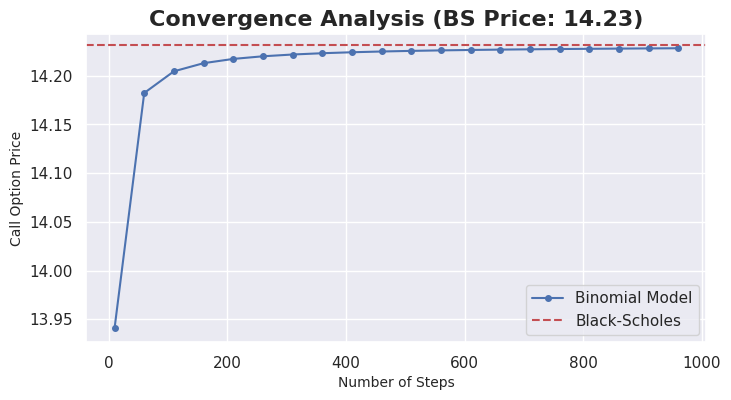

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(steps, binomial_prices, marker='o', label='Binomial Model', markersize=4)
plt.axhline(bs_price, color='r', linestyle='--', label='Black-Scholes')
plt.title(f'Convergence Analysis (BS Price: {bs_price:.2f})', fontsize=16, fontweight='bold')
plt.xlabel('Number of Steps', fontsize=10, fontweight='medium')
plt.ylabel('Call Option Price', fontsize=10, fontweight='medium')
plt.legend()
plt.grid(True)
plt.show()

### Convergence of Binomial Option Pricing to Black-Scholes

The graph above illustrates the convergence behavior of the **Binomial Option Pricing Model (BOPM)** toward the analytical **Black-Scholes Model (BSM)** price as the number of time steps ($N$) increases.

- The **blue line** represents the option price computed using the binomial model for increasing values of $N$.
- The **dashed red line** shows the theoretical price from the Black-Scholes formula, serving as a benchmark.

---

#### Observations

- For small values of N (e.g., N = 10), the binomial model **underestimates** the option price.
- As N increases, the binomial price **rapidly approaches** the Black-Scholes price.
- Around N = 500 and beyond, the binomial output closely **matches** the BSM value, indicating numerical convergence.

---

#### Implication

This convergence demonstrates the **accuracy and reliability** of the binomial model for pricing European options. While the binomial method is more flexible—especially for **American-style options** and handling **dividends**—its convergence to the Black-Scholes formula in the European case **validates its use as a numerical approximation method**.

$$
\lim_{N \to \infty} \text{Binomial_Price}(N) = \text{BSM_Price}
$$


#### Error Analysis

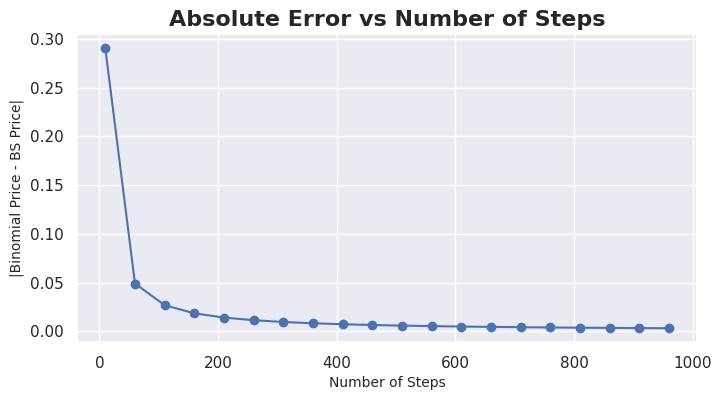

In [ ]:
errors = np.abs(np.array(binomial_prices) - bs_price)
plt.figure(figsize=(8,4))
plt.plot(steps, errors, marker='o')
plt.title('Absolute Error vs Number of Steps', fontsize=16, fontweight='bold')
plt.xlabel('Number of Steps', fontsize=10, fontweight='medium')
plt.ylabel('|Binomial Price - BS Price|', fontsize=10, fontweight='medium')
plt.grid(True)
plt.show()

### Error Analysis: Absolute Error vs Number of Steps

The graph above visualizes the **absolute error** between the **Binomial Option Pricing Model (BOPM)** and the **Black-Scholes Model (BSM)** as the number of steps N increases:

$$
\text{Absolute Error} = \left| \text{Binomial Price} - \text{Black-Scholes Price} \right|
$$

---

#### Observations

- The error is highest at very low values of N (e.g., N = 10), where the binomial model provides a **coarse approximation**.
- As the number of steps increases, the error **rapidly decreases**, indicating that the binomial model becomes more accurate.
- Beyond a certain number of steps (around N = 500), the error becomes **negligibly small** and stabilizes near zero.

---

#### Implication

This error analysis confirms that the **binomial model converges** to the Black-Scholes price as N increases. The **rate of convergence** is quite fast — even with a moderate number of steps, the binomial model provides an excellent approximation.

It also highlights a key trade-off between:

- **Accuracy** (improves with higher N)
- **Computational Cost** (also increases with higher N)

Hence, in practical implementations, choosing an appropriate value of N allows us to **balance both efficiency and precision**.


#### Computational Cost of nncreasing number of steps in Binomial Options Pricing

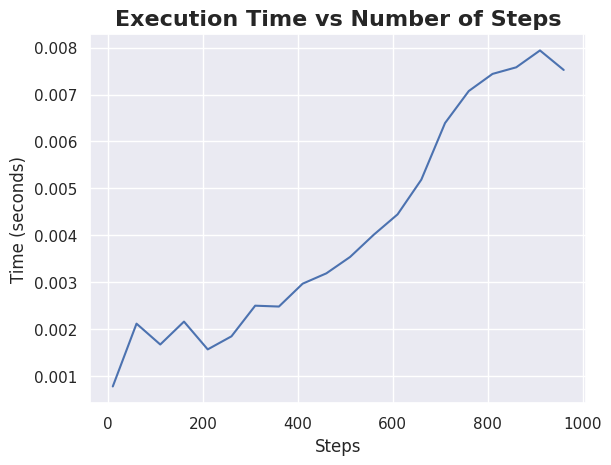

In [ ]:
import time

times = []
for N in steps:
    start = time.time()
    binomial = BinomialOptionPricer(S, K, r, T, sigma, N, option_type)
    binomial.price()
    times.append(time.time() - start)

plt.plot(steps, times)
plt.title('Execution Time vs Number of Steps', fontsize=16, fontweight='bold')
plt.xlabel('Steps')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()

### Execution Time vs Number of Steps (Binomial Model)

The graph below illustrates how the execution time of the binomial option pricing model increases with the number of time steps $N$:

---

#### Observations:

- Execution time **increases with $N$**, as expected.
- The growth is approximately **linear or slightly nonlinear**, since the binomial tree has size $N+1$ levels.
- Some fluctuations occur due to **system-level variations** (e.g., CPU load, memory access) especially at higher $N$.

---

#### Implication:

- While the binomial model **converges to the Black-Scholes price** as $N$ increases, it does so at the cost of **greater computational time**.
- This presents a trade-off in **real-time or high-volume applications**, where speed is critical.
- In practice, selecting a **moderate value of $N$ (e.g., 500$–$1000)** often offers a **good balance between accuracy and efficiency**.

---

This analysis **complements the convergence and error plots**, emphasizing the **computational cost** of improving pricing precision using the binomial model.


### Sensitivity Analysis

In this section, we examine how the option price reacts to changes in key input parameters:

- **Volatility ($\sigma$)**  
- **Time to Maturity ($T$)**  
- **Risk-Free Interest Rate ($r$)**  
- **Strike Price ($K$)**  

This analysis helps us understand the **Greeks** and the **financial behavior** of options under different market conditions.

We compare the outputs of the **Black-Scholes Model** and the **Binomial Option Pricing Model** across these parameters to evaluate:

- Pricing consistency  
- Model responsiveness   

$$
\text{Sensitivity} = \frac{\partial \text{Option Price}}{\partial \text{Parameter}}
$$

The goal is to visualize how sensitive the option's value is to small changes in each variable.


#### 1. Volatility Sensitivity

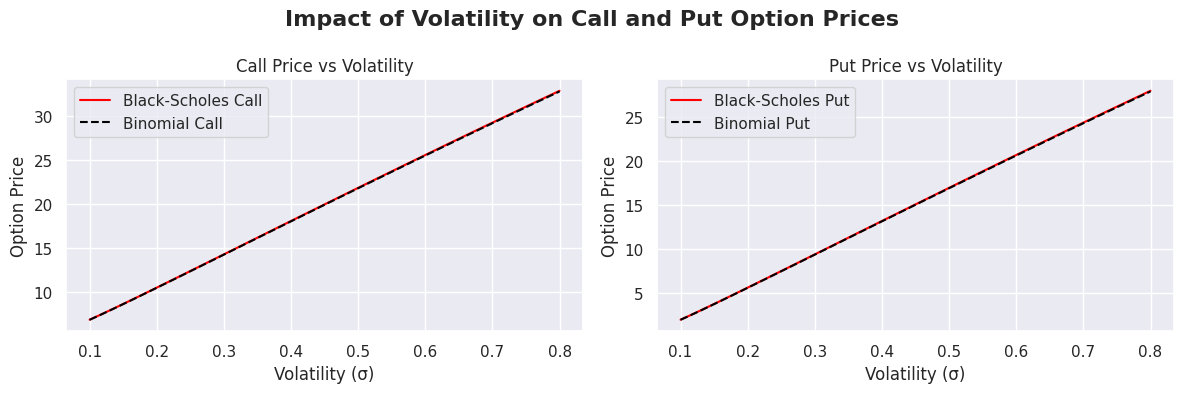

In [ ]:
# Parameter setup
volatilities = np.linspace(0.1, 0.8, 50)
S = 100
K = 100
T = 1
r = 0.05

# Call prices
bs_call_prices = [BlackScholesModel(S, K, T, r, σ, 'call').price() for σ in volatilities]
bin_call_prices = [BinomialOptionPricer(S, K, r, T, σ, 100, 'call').price() for σ in volatilities]

# Put prices
bs_put_prices = [BlackScholesModel(S, K, T, r, σ, 'put').price() for σ in volatilities]
bin_put_prices = [BinomialOptionPricer(S, K, r, T, σ, 100, 'put').price() for σ in volatilities]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Call Option Plot
ax1.plot(volatilities, bs_call_prices, label='Black-Scholes Call', color='Red')
ax1.plot(volatilities, bin_call_prices, '--', label='Binomial Call', color='Black')
ax1.set_title('Call Price vs Volatility')
ax1.set_xlabel('Volatility (σ)')
ax1.set_ylabel('Option Price')
ax1.legend()
ax1.grid(True)

# Put Option Plot
ax2.plot(volatilities, bs_put_prices, label='Black-Scholes Put', color='Red')
ax2.plot(volatilities, bin_put_prices, '--', label='Binomial Put', color='Black')
ax2.set_title('Put Price vs Volatility')
ax2.set_xlabel('Volatility (σ)')
ax2.set_ylabel('Option Price')
ax2.legend()
ax2.grid(True)

plt.suptitle('Impact of Volatility on Call and Put Option Prices', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Volatility Sensitivity: Call & Put Options

The plots above show how European call and put option prices change with increasing volatility ($\sigma$), using both the **Black-Scholes** and **Binomial Tree** models.

#### Key Observations:

- As volatility ($\sigma$) **increases**, both **call** and **put** option prices **increase approximately linearly**.
- This occurs because higher volatility increases the **probability of favorable price movements** in either direction:
  - For **calls**, the chance of $S > K$ increases.
  - For **puts**, the chance of $S < K$ increases.
- This behavior reflects **positive vega** ($\nu$) for both call and put options.
- The **Binomial model** (100 steps) tracks the **Black-Scholes model** closely across the entire volatility range.
- The price difference between the models is **negligible**, showing high consistency.

#### Interpretation:

- **Vega** ($\nu$) measures the sensitivity of option price to changes in volatility:
  $$ \nu = \frac{\partial V}{\partial \sigma} > 0 \quad \text{for both calls and puts} $$
- Higher volatility implies **greater uncertainty** in the asset’s future value, which makes options **more valuable**:
  - More volatility means more chances the option ends up **in the money**.
- Thus, both **call and put options become more expensive** as volatility rises.

#### Implication:

- **Volatility is a key driver of option pricing**.
- The observed results confirm that:
  - Call and put values **increase** with volatility.
  - The **Binomial model** provides an accurate approximation of **Black-Scholes pricing** for vega sensitivity.
- This demonstrates the **robustness of the Binomial Tree** method in modeling volatility effects, especially when continuous assumptions are relaxed.


#### 2. Time to Maturity Sensitivity

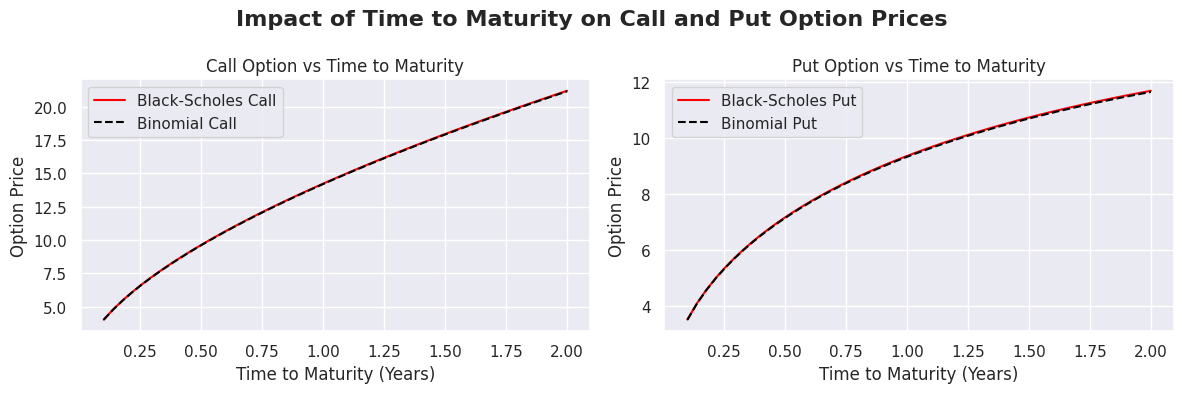

In [ ]:
# Parameters
times = np.linspace(0.1, 2, 50)
S = 100
K = 100
r = 0.05
sigma = 0.3
N = 100

# Call prices
bs_calls = [BlackScholesModel(S, K, t, r, sigma, 'call').price() for t in times]
bin_calls = [BinomialOptionPricer(S, K, r, t, sigma, N, 'call').price() for t in times]

# Put prices
bs_puts = [BlackScholesModel(S, K, t, r, sigma, 'put').price() for t in times]
bin_puts = [BinomialOptionPricer(S, K, r, t, sigma, N, 'put').price() for t in times]

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Call subplot
ax1.plot(times, bs_calls, label='Black-Scholes Call', color='Red')
ax1.plot(times, bin_calls, '--', label='Binomial Call', color='Black')
ax1.set_title('Call Option vs Time to Maturity')
ax1.set_xlabel('Time to Maturity (Years)')
ax1.set_ylabel('Option Price')
ax1.legend()
ax1.grid(True)

# Put subplot
ax2.plot(times, bs_puts, label='Black-Scholes Put', color='Red')
ax2.plot(times, bin_puts, '--', label='Binomial Put', color='Black')
ax2.set_title('Put Option vs Time to Maturity')
ax2.set_xlabel('Time to Maturity (Years)')
ax2.set_ylabel('Option Price')
ax2.legend()
ax2.grid(True)

plt.suptitle('Impact of Time to Maturity on Call and Put Option Prices', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Time to Maturity Sensitivity: Call & Put Options

The plots above illustrate how the prices of European **call** and **put** options change with increasing time to maturity ($T$), using both the **Black-Scholes** and **Binomial Tree** models.

#### Key Observations:
- Both **call** and **put** option prices increase as time to maturity ($T$) increases.
- The relationship is **nonlinear but upward-sloping**, indicating increasing value with longer durations.
- The **Binomial model** (dashed line) closely follows the **Black-Scholes** model (solid line) across all maturities.
- The difference between the two models is minimal, confirming a strong level of agreement.

#### Interpretation:
- Longer time to maturity implies **greater uncertainty** in the future price of the underlying asset.
- For **calls**, more time means a higher chance for the asset price to rise above the strike ($S > K$).
- For **puts**, more time increases the likelihood of the asset price falling below the strike ($S < K$).
- This behavior reflects the role of **theta** — the sensitivity of option price to the passage of time.
- This reflects the positive **theta** behavior — longer maturities reduce the impact of time decay, thus increasing option value.

#### Implication:
- Option value is **positively related to time to maturity** due to the growing potential for profitable movements in the underlying asset.
- The **Binomial model** remains a **robust and accurate alternative** to the Black-Scholes model even over longer durations.
- This demonstrates the **practical utility** of the Binomial approach, especially when the continuous assumptions of Black-Scholes are relaxed.

#### 3. Risk-Free Rate Sensitivity

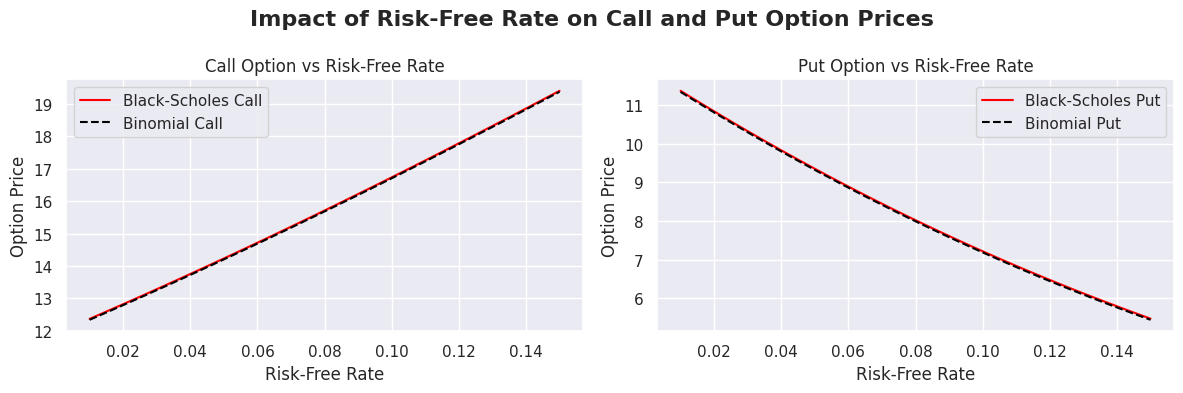

In [ ]:
# Parameters
rates = np.linspace(0.01, 0.15, 50)  # 1% to 15%
S = 100
K = 100
T = 1
sigma = 0.3
N = 100

# Call prices
bs_calls = [BlackScholesModel(S, K, T, r, sigma, 'call').price() for r in rates]
bin_calls = [BinomialOptionPricer(S, K, r, T, sigma, N, 'call').price() for r in rates]

# Put prices
bs_puts = [BlackScholesModel(S, K, T, r, sigma, 'put').price() for r in rates]
bin_puts = [BinomialOptionPricer(S, K, r, T, sigma, N, 'put').price() for r in rates]

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Call subplot
ax1.plot(rates, bs_calls, label='Black-Scholes Call', color='Red')
ax1.plot(rates, bin_calls, '--', label='Binomial Call', color='Black')
ax1.set_title('Call Option vs Risk-Free Rate')
ax1.set_xlabel('Risk-Free Rate')
ax1.set_ylabel('Option Price')
ax1.legend()
ax1.grid(True)

# Put subplot
ax2.plot(rates, bs_puts, label='Black-Scholes Put', color='Red')
ax2.plot(rates, bin_puts, '--', label='Binomial Put', color='Black')
ax2.set_title('Put Option vs Risk-Free Rate')
ax2.set_xlabel('Risk-Free Rate')
ax2.set_ylabel('Option Price')
ax2.legend()
ax2.grid(True)

plt.suptitle('Impact of Risk-Free Rate on Call and Put Option Prices', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Risk-Free Rate Sensitivity: Call & Put Options

The plots above demonstrate how option prices change with varying risk-free interest rates, using both the **Black-Scholes** and **Binomial Tree** models.

#### Key Observations:

- Call option prices **increase** as the risk-free rate increases.
- Put option prices **decrease** as the risk-free rate increases.
- The **Binomial model** (dashed black) closely follows the **Black-Scholes model** (solid red) for both calls and puts.
- The relationship is nearly **linear**.

#### Interpretation:

- For **call options**, a higher risk-free rate reduces the present value of the strike price:  $C \uparrow \quad \text{as} \quad r \uparrow$
  

- For **put options**, a higher rate lowers the present value of the payoff:  $P \downarrow \quad \text{as} \quad r \uparrow$

- This reflects **rho** ($\rho$) sensitivity:
  - **Call rho** is positive: $$\frac{\partial C}{\partial r} > 0$$
  - **Put rho** is negative: $$\frac{\partial P}{\partial r} < 0$$

#### Implication:

- **Interest rates** significantly impact option pricing.
- **Call options** gain value with rising interest rates.
- **Put options** lose value as interest rates increase.
- The **Binomial model** continues to perform accurately, even when assumptions of Black-Scholes (e.g., lognormal price distribution, constant volatility) might not fully hold.


#### 4. Strike Price Sensitivity

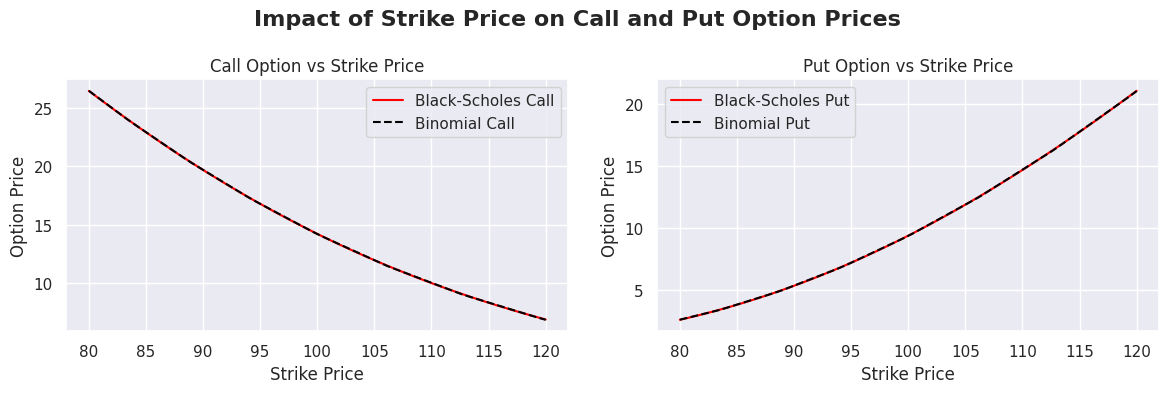

In [ ]:
# Parameters
strikes = np.linspace(80, 120, 50)  # Deep ITM to Deep OTM
S = 100
T = 1
r = 0.05
σ = 0.3
N = 100  # Binomial steps

# Call prices
bs_calls = [BlackScholesModel(S, K, T, r, σ, 'call').price() for K in strikes]
bin_calls = [BinomialOptionPricer(S, K, r, T, σ, N, 'call').price() for K in strikes]

# Put prices
bs_puts = [BlackScholesModel(S, K, T, r, σ, 'put').price() for K in strikes]
bin_puts = [BinomialOptionPricer(S, K, r, T, σ, N, 'put').price() for K in strikes]

# Plotting side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Call subplot
ax1.plot(strikes, bs_calls, label='Black-Scholes Call', color='red')
ax1.plot(strikes, bin_calls, '--', label='Binomial Call', color='black')
ax1.set_title('Call Option vs Strike Price')
ax1.set_xlabel('Strike Price')
ax1.set_ylabel('Option Price')
ax1.legend()
ax1.grid(True)

# Put subplot
ax2.plot(strikes, bs_puts, label='Black-Scholes Put', color='red')
ax2.plot(strikes, bin_puts, '--', label='Binomial Put', color='black')
ax2.set_title('Put Option vs Strike Price')
ax2.set_xlabel('Strike Price')
ax2.set_ylabel('Option Price')
ax2.legend()
ax2.grid(True)

plt.suptitle('Impact of Strike Price on Call and Put Option Prices', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Strike Price Sensitivity: Call & Put Options

The plots above demonstrate how option prices change with varying **strike prices**, using both the **Black-Scholes** and **Binomial Tree** models.

#### Key Observations:

- **Call option prices** decrease as the strike price increases.
- **Put option prices** increase as the strike price increases.
- The **Binomial model** (dashed black) closely tracks the **Black-Scholes model** (solid red).
- Both curves are slightly **nonlinear**, reflecting changes in intrinsic and time value.

#### Interpretation:

- For **call options**, a higher strike price reduces the chance of profitable exercise:  $C \downarrow \quad \text{as} \quad K \uparrow$

- For **put options**, a higher strike price increases the potential payoff:  $P \uparrow \quad \text{as} \quad K \uparrow$

- This reflects **delta** and **moneyness** effects:
  - **Call delta** becomes smaller as strike price increases.
  - **Put delta** becomes more negative as strike price increases.

#### Implication:

- **Strike price** directly affects the **intrinsic value** of an option:
  
  - Call: $ \max(S - K, 0) $
  - Put: $ \max(K - S, 0) $

- As strike price moves **in-the-money** or **out-of-the-money**, the option premium adjusts accordingly.
- Both models yield consistent and accurate results across strike price ranges.


### Summary of Sensitivities

| Parameter       | Call Option Impact | Put Option Impact |
|----------------|--------------------|-------------------|
| Volatility ↑   | Price ↑            | Price ↑           |
| Time ↑         | Price ↑ (ATM/OTM)  | Price ↑ (ATM/OTM) |
| Interest Rate ↑| Price ↑            | Price ↓           |
| Strike Price ↑ | Price ↓            | Price ↑           |


### Real-World Option Pricing Analysis using Market Data

Used live option chain data from **Yahoo Finance (via yfinance)** for a large-cap US stock (AAPL) to validate the theoretical option pricing models — **Black-Scholes** and **Binomial Tree** — against actual market prices.

In [ ]:
!pip install yfinance --quiet

import yfinance as yf
import datetime as dt

# Step 1: Fetch AAPL option chain and current price
ticker = "AAPL"
stock = yf.Ticker(ticker)
today = dt.date.today()

# Use earliest expiry
expiry = stock.options[0]
option_chain = stock.option_chain(expiry)

calls = option_chain.calls
puts = option_chain.puts

# Step 2: Get current stock price
S = stock.history(period="1d")['Close'].iloc[0]

# Step 3: Choose strike price closest to spot
strike = min(calls['strike'], key=lambda x: abs(x - S))

# Step 4: Time to maturity
T = (dt.datetime.strptime(expiry, "%Y-%m-%d").date() - today).days / 365
r = 0.05  # Risk-free rate

# Step 5: Get implied volatilities and market prices
σ_call = calls[calls['strike'] == strike]['impliedVolatility'].values[0]
σ_put = puts[puts['strike'] == strike]['impliedVolatility'].values[0]

market_call = calls[calls['strike'] == strike]['lastPrice'].values[0]
market_put = puts[puts['strike'] == strike]['lastPrice'].values[0]

# Step 6: Calculate model prices (your classes must be defined above)
bs_call = BlackScholesModel(S, strike, T, r, σ_call, option_type='call').price()
bs_put = BlackScholesModel(S, strike, T, r, σ_put, option_type='put').price()

bin_call = BinomialOptionPricer(S, strike, r, T, σ_call, 100, option_type='call').price()
bin_put = BinomialOptionPricer(S, strike, r, T, σ_put, 100, option_type='put').price()

# Step 7: Display results
print(f"Spot Price: {S:.2f}")
print(f"Strike Price: {strike}, Expiry: {expiry}, T: {T:.2f} years")
print(f"Implied Vol (Call): {σ_call:.2f}, Implied Vol (Put): {σ_put:.2f}\n")

print(f"Market Call Price: {market_call}")
print(f"BS Call Price: {bs_call:.2f}, Binomial Call Price: {bin_call:.2f}\n")

print(f"Market Put Price: {market_put}")
print(f"BS Put Price: {bs_put:.2f}, Binomial Put Price: {bin_put:.2f}")

Spot Price: 203.92
Strike Price: 205.0, Expiry: 2025-06-13, T: 0.02 years
Implied Vol (Call): 0.32, Implied Vol (Put): 0.30

Market Call Price: 3.05
BS Call Price: 2.91, Binomial Call Price: 2.92

Market Put Price: 3.95
BS Put Price: 3.65, Binomial Put Price: 3.66


Given the market parameters:

- Spot Price: $S = 203.92$  
- Strike Price: $K = 205.0$  
- Time to Maturity: $T = 0.02 \text{ years}$  
- Risk-Free Rate: $r = 5\%$  
- Implied Volatility (Call): $\sigma_{\text{call}} = 0.32$  
- Implied Volatility (Put): $\sigma_{\text{put}} = 0.30$  

We compare theoretical and market option prices:

| Option Type | Market Price | Black-Scholes Price | Binomial Price |
|-------------|---------------|----------------------|----------------|
| Call        | \$3.05        | \$2.91               | \$2.92         |
| Put         | \$3.95        | \$3.65               | \$3.66         |

#### Interpretation:

- Both models provide prices close to actual market values.
- The Binomial model closely approximates the Black-Scholes price.
- Slight differences can be attributed to real-world factors such as bid-ask spreads, market sentiment, or volatility surface effects.

This confirms that both pricing models are **robust and reliable** under real market conditions.

### Visualizing Model Predictions vs. Real Market Option Prices

This section compares predicted option prices from the **Black-Scholes** and **Binomial Tree** models with actual market prices obtained from `yfinance`.

- Option prices are plotted for a range of **strike prices**, with a **fixed expiry date**.
- Separate plots are generated for **call** and **put** options.
- This allows evaluation of how model estimates align with real-world market data across different moneyness regions — in-the-money (ITM), at-the-money (ATM), and out-of-the-money (OTM).

Such visualizations provide insights into the accuracy and limitations of each pricing model under real market conditions.

$$
\text{Models Used:} \quad \text{Black-Scholes (Closed-form)} \quad \text{vs.} \quad \text{Binomial Tree (Discrete)}
$$

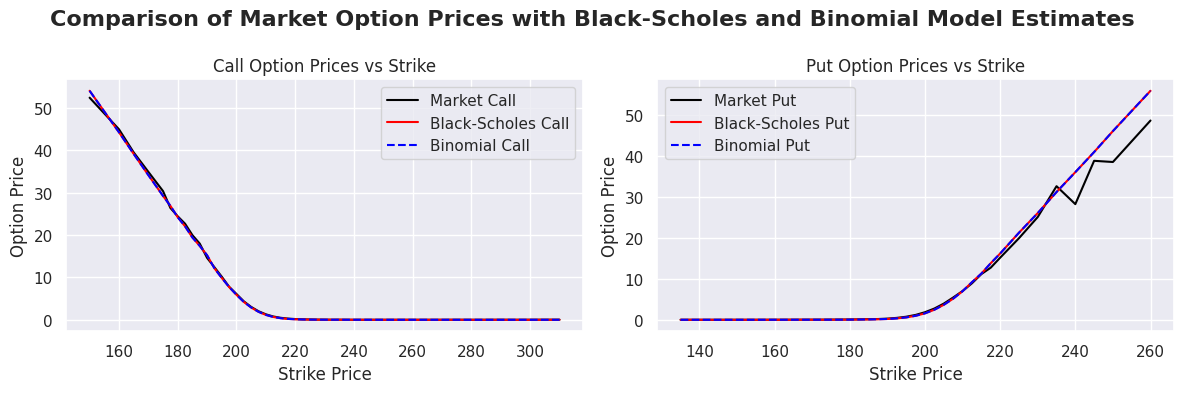

In [ ]:
# --- Step 1: Fetch Option Chain Data ---
ticker = "AAPL"
stock = yf.Ticker(ticker)
expiry = stock.options[0]  # Choose a near-term expiry like 0 or 1
opt_chain = stock.option_chain(expiry)
calls = opt_chain.calls
puts = opt_chain.puts
today = dt.date.today()
spot = stock.history(period="1d")['Close'].iloc[0]

# --- Step 2: Preprocessing ---
T = (dt.datetime.strptime(expiry, "%Y-%m-%d").date() - today).days / 365
r = 0.05  # risk-free rate
N = 100   # steps for binomial

# --- Step 3: Loop over available strikes and calculate prices ---
call_data = []
put_data = []

for _, row in calls.iterrows():
    K = row['strike']
    market_price = row['lastPrice']
    sigma = row['impliedVolatility']

    if np.isnan(sigma) or sigma > 1: continue  # skip unrealistic IVs

    bs_price = BlackScholesModel(spot, K, T, r, sigma, option_type='call').price()
    bin_price = BinomialOptionPricer(spot, K, r, T, sigma, N, option_type='call').price()

    call_data.append((K, market_price, bs_price, bin_price))

for _, row in puts.iterrows():
    K = row['strike']
    market_price = row['lastPrice']
    sigma = row['impliedVolatility']

    if np.isnan(sigma) or sigma > 1: continue

    bs_price = BlackScholesModel(spot, K, T, r, sigma, option_type='put').price()
    bin_price = BinomialOptionPricer(spot, K, r, T, sigma, N, option_type='put').price()

    put_data.append((K, market_price, bs_price, bin_price))

# --- Step 4: Convert to numpy arrays and sort by strike ---
call_data = np.array(call_data)
call_data = call_data[call_data[:, 0].argsort()]
put_data = np.array(put_data)
put_data = put_data[put_data[:, 0].argsort()]

# --- Step 5: Plot ---
plt.figure(figsize=(12, 4))

# Call Option Plot
plt.subplot(1, 2, 1)
plt.plot(call_data[:, 0], call_data[:, 1], label='Market Call', color='black')
plt.plot(call_data[:, 0], call_data[:, 2], label='Black-Scholes Call', color='red')
plt.plot(call_data[:, 0], call_data[:, 3], label='Binomial Call', linestyle='--', color='blue')
plt.title('Call Option Prices vs Strike')
plt.xlabel('Strike Price'); plt.ylabel('Option Price')
plt.legend(); plt.grid(True)

# Put Option Plot
plt.subplot(1, 2, 2)
plt.plot(put_data[:, 0], put_data[:, 1], label='Market Put', color='black')
plt.plot(put_data[:, 0], put_data[:, 2], label='Black-Scholes Put', color='red')
plt.plot(put_data[:, 0], put_data[:, 3], label='Binomial Put', linestyle='--', color='blue')
plt.title('Put Option Prices vs Strike')
plt.xlabel('Strike Price'); plt.ylabel('Option Price')
plt.legend(); plt.grid(True)

plt.suptitle('Comparison of Market Option Prices with Black-Scholes and Binomial Model Estimates', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

The plots above compare predicted European option prices using the **Black-Scholes** and **Binomial Tree** models with **actual market prices** (retrieved via `yfinance`). The x-axis represents different strike prices, while the y-axis shows the corresponding option prices.

Two panels are presented:
- **Left**: Call Option Prices vs. Strike
- **Right**: Put Option Prices vs. Strike

---

###  Interpreting Moneyness Regions

Let the **current stock price** be denoted by $S$. Based on the strike price $K$, option moneyness is categorized as:

- For **Call Options**:
  - ITM: $K < S$ (option has intrinsic value)
  - ATM: $K \approx S$
  - OTM: $K > S$
  
- For **Put Options**:
  - ITM: $K > S$
  - ATM: $K \approx S$
  - OTM: $K < S$

From the plots, we can infer:
- Around $K = 220$, options are **ATM**.
- Left of $220$: Calls are **ITM**, Puts are **OTM**.
- Right of $220$: Calls are **OTM**, Puts are **ITM**.

---

### Why Market Prices Deviate from Model Predictions

Although the Black-Scholes and Binomial models provide theoretical prices, actual market prices can deviate due to real-world frictions. Key factors include:

#### 1. **Bid-Ask Spread**
- The bid is the **highest price a buyer is willing to pay**.
- The ask is the **lowest price a seller will accept**.
- The model price often lies **between the bid and ask**, but actual trades occur at either end.

 _Example_: Model estimates price as ₹10.  
 - Bid: ₹9, Ask: ₹11  
 - Market may show a price anywhere between ₹9 and ₹11.

#### 2. **Liquidity Issues**
- Some options have **very low trading volume**, especially deep ITM or OTM options.
- Illiquid markets lead to:
  - **Wider bid-ask spreads**
  - **Irregular price movements**
  - **Infrequent updates**

 _Example_: A deep OTM put is rarely traded, so its last recorded price might not reflect its true value.

#### 3. **Data Limitations**
- Data from sources like `yfinance` may be:
  - **Delayed (e.g., from previous day’s close)**
  - **Sparse (some strikes missing or zero volume)**
- These gaps reduce the accuracy of model-vs-market comparison.

 _Example_: You compute today's model price with updated inputs, but the market price shown is from yesterday.

---

### Conclusion

- While both models align well with each other, **market imperfections cause deviations** in actual observed prices.
- These include **bid-ask spread effects**, **liquidity constraints**, and **data limitations**.
- Thus, small discrepancies in the plots are natural and expected when comparing theoretical models to real-world market data.

### Choosing Between Black-Scholes and Binomial Tree Models

When pricing European options, both the **Black-Scholes** and **Binomial Tree** models are widely used. However, each has strengths and limitations, making them suitable for different scenarios.

---

### **Black-Scholes Model**

#### When to Use:
- For **European options** with:
  - Constant volatility
  - No early exercise
  - No dividends (or simple dividend adjustment)
- When you need **fast, closed-form solutions**

#### Limitations:
- Cannot price **American options** (which can be exercised early)
- Assumes **log-normal asset prices** and **constant volatility**
- Less flexible for **discrete events** like dividends

---

### **Binomial Tree Model**

#### When to Use:
- For **both European and American options**
- When option includes:
  - **Dividends**
  - **Early exercise features**
  - **Path dependency** (e.g., barriers)
- When more **customization** is required (e.g., step-by-step modeling of volatility or interest rates)

#### Limitations:
- Computationally heavier than Black-Scholes
- Slower for large number of steps, though accuracy improves with more steps

---

#### Summary Table

| Feature                        | Black-Scholes              | Binomial Tree               |
|-------------------------------|----------------------------|-----------------------------|
| Option Type                   | European only              | European & American         |
| Handles Dividends             | Approximation only         | Yes (easily incorporated)   |
| Early Exercise                |  Not supported            |  Supported                |
| Speed                         |  Fast (closed-form)       |  Slower (numerical)       |
| Customization/Flexibility     |  Low                     |  High                     |

---

### Final Insight:

- Use **Black-Scholes** when assumptions hold (European style, no dividends, constant volatility).
- Use **Binomial Tree** when **flexibility** or **early exercise** features matter.